<a href="https://colab.research.google.com/github/mdfardinxyz/Evolution-of-21cm-Radiation/blob/main/Cosmo_Bright_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 2**
# **Mozammal Hossain Masum 2211403**
# **Mollika Rani Del       2010224**
# **Md. Fardin Islam       2130399**

# **Abstract:**

The code, executed with a fixed redshift (z), constructs a cubic representation of the universe. Here, the x and y axes mirror the vast expanse of the sky in light-years, while the z-axis encapsulates the redshift parameter. The center of this cube embodies the specified redshift value, offering a snapshot of the universe at a particular cosmic epoch.

Within this cubic canvas, the code gives us the motions of neutral hydrogen, tracing the evolution of 21cm radiation. The simulation encapsulates the interplay between cosmic expansion, gravity, and the intricate dance of matter. As the code iterates through the simulated universe, it provides a dynamic visualization of how cosmic structures evolve, influenced by the fundamental cosmological parameters.

In [ ]:
import py21cmfast as p21c
from py21cmfast import plotting
from py21cmfast import cache_tools

import matplotlib.pyplot as plt
import logging, sys, os, numpy as np
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

/home/masum/anaconda3/lib/python3.11/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/masum/anaconda3/lib/python3.11/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


# **Adding Ingredients:**

By 21cmfast we are doing cube creation here and by powerspectrum, the rest calculations are plotted & graphed.

Where,

hlittle = hubble parameter \
omega matter = total ordinary matter density of the universe \
omega baryon = just the ordinary {baryonic matter}

by putting these values we can create different types of universes and observe the evolution of the universe as well. Where hubble parameter behaves as the expansion rate of the universe and Omega parameters behave like the gravitational pull and so.

Eventually we get a graph which tells us the brightness-temperature function in respect with redshift parameter. Which tells us about maps of the cosmic hydrogens at a particular z value.

In [ ]:
# Default cosmo params: 0.80, 0.69, 0.31, 0.02

def brightness_temperature(box, redshift, hubble, matter, baryon):
    initial_conditions = p21c.initial_conditions(
        user_params = {"HII_DIM": box, "BOX_LEN": box},
        cosmo_params = p21c.CosmoParams(SIGMA_8=0.8, hlittle=hubble, OMm=matter, OMb=baryon),
        random_seed=54321
    )

    perturbed_field = p21c.perturb_field(
        redshift = redshift,
        init_boxes = initial_conditions
    )

    ionized_field = p21c.ionize_box(
        perturbed_field = perturbed_field
    )

    brightness_temp = p21c.brightness_temperature(ionized_box=ionized_field, perturbed_field=perturbed_field)

    return brightness_temp

z = np.linspace(5, 30, 50)

T1 = np.array([brightness_temperature(box=50, redshift=i, hubble=0.69, matter=0.31, baryon=0.02).brightness_temp for i in z])

T2 = np.array([brightness_temperature(box=50, redshift=i, hubble=0.9, matter=0.31, baryon=0.02).brightness_temp for i in z])

T3 = np.array([brightness_temperature(box=50, redshift=i, hubble=0.69, matter=0.6, baryon=0.02).brightness_temp for i in z])


/home/masum/anaconda3/lib/python3.11/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/home/masum/anaconda3/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(


In [ ]:
T1.shape

(50, 50, 50, 50)

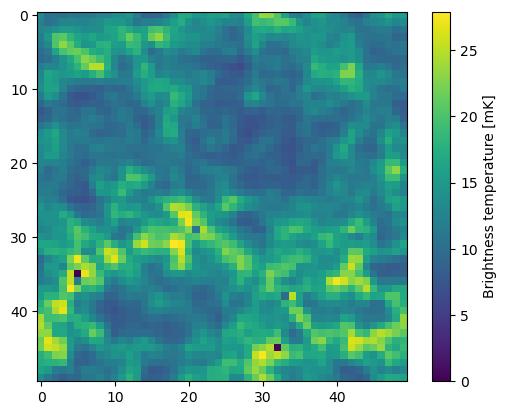

In [ ]:
plt.imshow(T1[20,:,:,0]);
cb = plt.colorbar()
cb.set_label('Brightness temperature [mK]')

Text(0.5, 1.0, 'Spectrum of cosmic hydrogen')

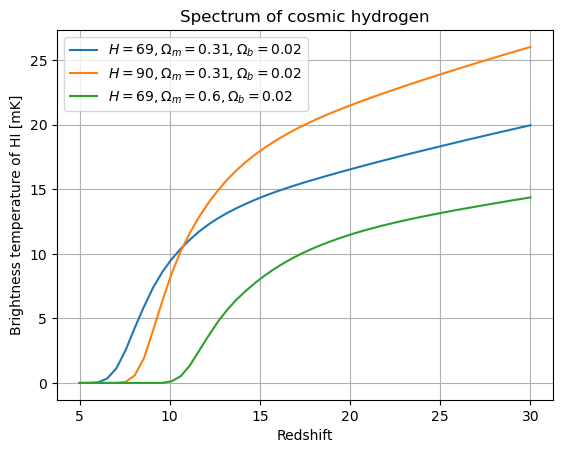

In [ ]:
plt.plot(z, np.mean(T1, axis=(1,2,3)), label='$H=69, \Omega_m=0.31, \Omega_b=0.02$')
plt.plot(z, np.mean(T2, axis=(1,2,3)), label='$H=90, \Omega_m=0.31, \Omega_b=0.02$')
plt.plot(z, np.mean(T3, axis=(1,2,3)), label='$H=69, \Omega_m=0.6, \Omega_b=0.02$')

plt.xlabel('Redshift')
plt.ylabel('Brightness temperature of HI [mK]')
plt.legend()
plt.grid()
plt.title('Spectrum of cosmic hydrogen')


# **Graph Analysis**

The above graph represents the brightness temperature of hydrogen 1 for different redshift values. We plotted three graphs: The blue graph is the default graph where the values of the parameters are that of the real values in our universe. The green graph is a graph for a universe with higher matter density than the real density of matter, and the yellow graph is a graph for a universe if hubble parameter was higher.

The redshift 30 represents universe in the past and redshift 5 represents present universe.
From neutral hydrogen, we get a 21cm radiation and that radiation is observed through the brightness temperature. So when brightness temperature is zero, that means all neutral hydrogens have been ionized.

We observed for the yellow graph, that when the hubble parameter is increased to 90, the universe expands faster, so there is a decrease in the brightness temperature of H1 from redshift 30 to around 7.5 (where it becomes zero), so the neutral hydrogens will be ionized at a faster rate compared to the blue graph.
In green graph where the hubble parameter was kept as default but matter density was increased,we can see that brightness temperature of the green graph becomes zero at around redshift 10, so more matter means more stars and galaxies are produced, therefore more neutral hyrdrogens will be ionized at a rate faster than the one in the blue graph.